# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [2]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [3]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

Text(0, 0.5, 'x2')

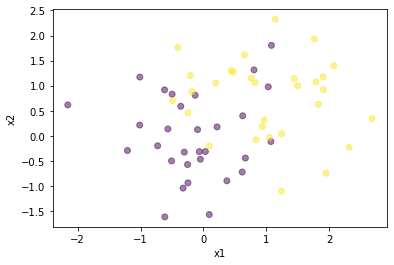

In [4]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from tensorflow import keras
from tensorflow.keras import layers

### Create a model that overfits

In [6]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'sigmoid' activation


model = keras.Sequential(name="Q4")
model.add(layers.Dense(50, activation="relu", name="hidden1"))
model.add(layers.Dense(50, activation="relu", name="hidden2"))
model.add(layers.Dense(50, activation="relu", name="hidden3"))
model.add(layers.Dense(1, activation="sigmoid", name="out"))


In [7]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(sgx, sgy)

In [8]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Start training and fit your model with desired parameters and validation_split=0.2



history = model.fit(train_data, train_labels, batch_size=1, epochs=100, shuffle=True, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.7778 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 2/100
36/36 [==============================] - 0s 807us/step - loss: 0.5824 - accuracy: 0.7778 - val_loss: 0.5984 - val_accuracy: 0.5556
Epoch 3/100
36/36 [==============================] - 0s 773us/step - loss: 0.5211 - accuracy: 0.7778 - val_loss: 0.5577 - val_accuracy: 0.7778
Epoch 4/100
36/36 [==============================] - 0s 831us/step - loss: 0.4822 - accuracy: 0.7778 - val_loss: 0.4923 - val_accuracy: 0.7778
Epoch 5/100
36/36 [==============================] - 0s 936us/step - loss: 0.4480 - accuracy: 0.8056 - val_loss: 0.4536 - val_accuracy: 0.7778
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8333 - val_loss: 0.4555 - val_accuracy: 0.7778
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8333 - val_loss: 0.4274 - val_accuracy: 0.7778
Epoch

### Plot Your Results

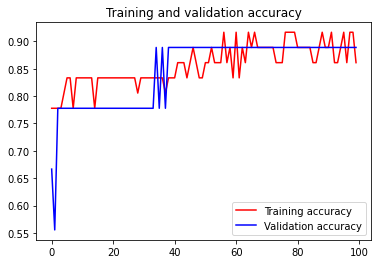

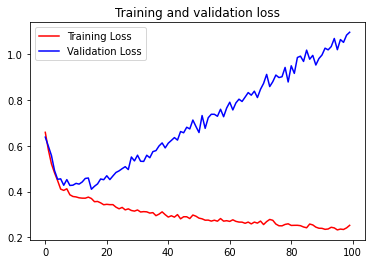

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [11]:
# Evaluate your model with train and test data


score = model.evaluate(
    test_data, test_labels, verbose=0
)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.show()

Test loss: 0.5985009670257568
Test accuracy: 0.800000011920929


# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

In [12]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dropout


In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(sgx, sgy)

In [21]:
model = keras.Sequential(name="Q4")
model.add(layers.Dense(50, activation="relu", name="hidden1",kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(layers.Dense(50, activation="relu", name="hidden2",kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(layers.Dense(50, activation="relu", name="hidden3"))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation="sigmoid", name="out"))


In [43]:
model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

from sklearn.model_selection import KFold
kf = KFold(n_splits=8)
kf.get_n_splits(train_data)

for train_index, test_index in kf.split(train_data):
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    history = model.fit(X_train, y_train, batch_size=1, epochs=10, shuffle=True, validation_data=(X_test,y_test))

Epoch 1/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.8205 - val_loss: 0.4442 - val_accuracy: 0.8333
Epoch 2/10
39/39 [==============================] - 0s 755us/step - loss: 0.4326 - accuracy: 0.8205 - val_loss: 0.5490 - val_accuracy: 0.8333
Epoch 3/10
39/39 [==============================] - 0s 761us/step - loss: 0.4799 - accuracy: 0.7436 - val_loss: 0.5026 - val_accuracy: 0.8333
Epoch 4/10
39/39 [==============================] - 0s 818us/step - loss: 0.4750 - accuracy: 0.8205 - val_loss: 0.5323 - val_accuracy: 0.8333
Epoch 5/10
39/39 [==============================] - 0s 821us/step - loss: 0.4497 - accuracy: 0.8205 - val_loss: 0.5092 - val_accuracy: 0.8333
Epoch 6/10
39/39 [==============================] - 0s 815us/step - loss: 0.4833 - accuracy: 0.8205 - val_loss: 0.5292 - val_accuracy: 0.8333
Epoch 7/10
39/39 [==============================] - 0s 813us/step - loss: 0.4473 - accuracy: 0.8462 - val_loss: 0.5428 - val_accuracy: 0.8333
Epoch 8/

In [44]:
score = model.evaluate(
    test_data, test_labels, verbose=0
)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.show()

Test loss: 0.3356872797012329
Test accuracy: 0.8666666746139526
